   # Framingham Heart Study

<u> Dataset Link </u>: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

## Background 

This is a part of data from an ungoing study being conduted in Framingham, Massachusetts, USA. It includes 15 columns and around 4200 rows, where each row presents a person's behavioural, demographic and medical (history and current) information. Each column is a potential risk factor. 

<u>Demographic</u>:
• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

<u>Behavioral</u>:
• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

<u>Medical( history)</u>:
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

<u>Medical(current)</u>:
• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

<u>Predict variable (desired target)</u>:

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

## Objective

For The dataset provides the risk factors associated with heart disease for the patients and whether they have a risk of coronary heart disease in the next 10 years. 

Based on the dataset provided:
1.	Predict the probability of a patient suffering a coronary heart disease in the next 10 years
2.	Identify the most important factors that influence heart disease
3.	Come up with recommendations for

  a.	Preventing / reducing chances of getting a heart disease
  
  b.	Extrapolated applications of the model you build and its findings

## Data Import & Clean Up

In [1]:
import os
import sys

os.chdir("C:/Users/apook/Desktop/HPE/Misc/Data Analytics/Projects/Project10-CAPSTONE/2. Coronory Heart Risk Study")

In [2]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# import dataset
data = pd.read_csv("raw_data.csv")

In [3]:
# view dataset
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# check dimensions
data.shape

(4240, 16)

In [5]:
# removing duplicates
data.drop_duplicates()
data.shape

(4240, 16)

In [6]:
# checking for blank cells
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
data.fillna(0, inplace = True)

In [8]:
# checking for blank cells
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
# get the mean, standard deviation, count, mix and max of the dataset
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.930425,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,233.908255,132.354599,82.897759,25.685184,75.861085,74.463208,0.151887
std,0.495027,8.572942,1.053026,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,51.166237,22.033300,11.910394,4.420501,12.080265,32.862256,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.500000,48.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.050000,68.000000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
# show the datatypes 
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [11]:
# using creating a dictonary to convert specific objects 
convert_dict = {"male" : str,
               "education" : str,
               "currentSmoker" : str,
               "BPMeds" : str,
               "prevalentStroke" : str,
               "prevalentHyp" : str,
               "diabetes" : str,
               "TenYearCHD" : str}

In [12]:
# assign the convert_dict datatypes into data dataset
data = data.astype(convert_dict)
data.dtypes

male                object
age                  int64
education           object
currentSmoker       object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD          object
dtype: object

In [13]:
# number of columns per data type 
list(set(data.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

### Box Plot

Creating a Box Plot and treating outliers

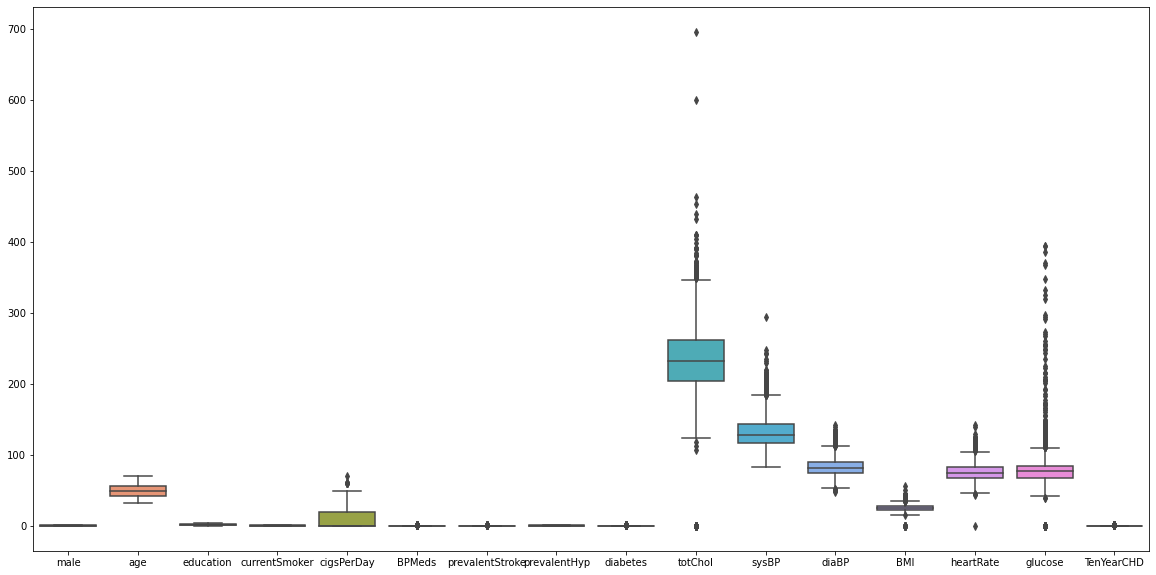

In [14]:
plt.figure(figsize=(20,10), facecolor='w')
sb.boxplot(data=data)
plt.show()

There are outliers in totChol, sysBP, diaBP, BMI, heartRate and Glucose columns. I will remove the outliers as anything over 75% of the maximum value. 

In [15]:
print("the max totChol is", data["totChol"].max())
print("the max sysBP is", data["sysBP"].max())
print("the max diaBP is", data["diaBP"].max())
print("the max BMI is", data["BMI"].max())
print("the max heartRate is", data["heartRate"].max())
print("the max glucose is", data["glucose"].max())

the max totChol is 696.0
the max sysBP is 295.0
the max diaBP is 142.5
the max BMI is 56.8
the max heartRate is 143.0
the max glucose is 394.0


In [16]:
data = data[data["totChol"] < 522]
data = data[data["sysBP"] < 221]
data = data[data["diaBP"] < 107]
data = data[data["BMI"] < 43]
data = data[data["heartRate"] < 107]
data = data[data["glucose"] < 296]

In [17]:
data.shape

(4001, 16)

### Exploratory Data Analytics (EDA)

In [18]:
data_num = data.select_dtypes(include = ["float64", "int64"])
data_num.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0


### Continous Variables 

#### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9EDB1C940>,
      dtype=object)

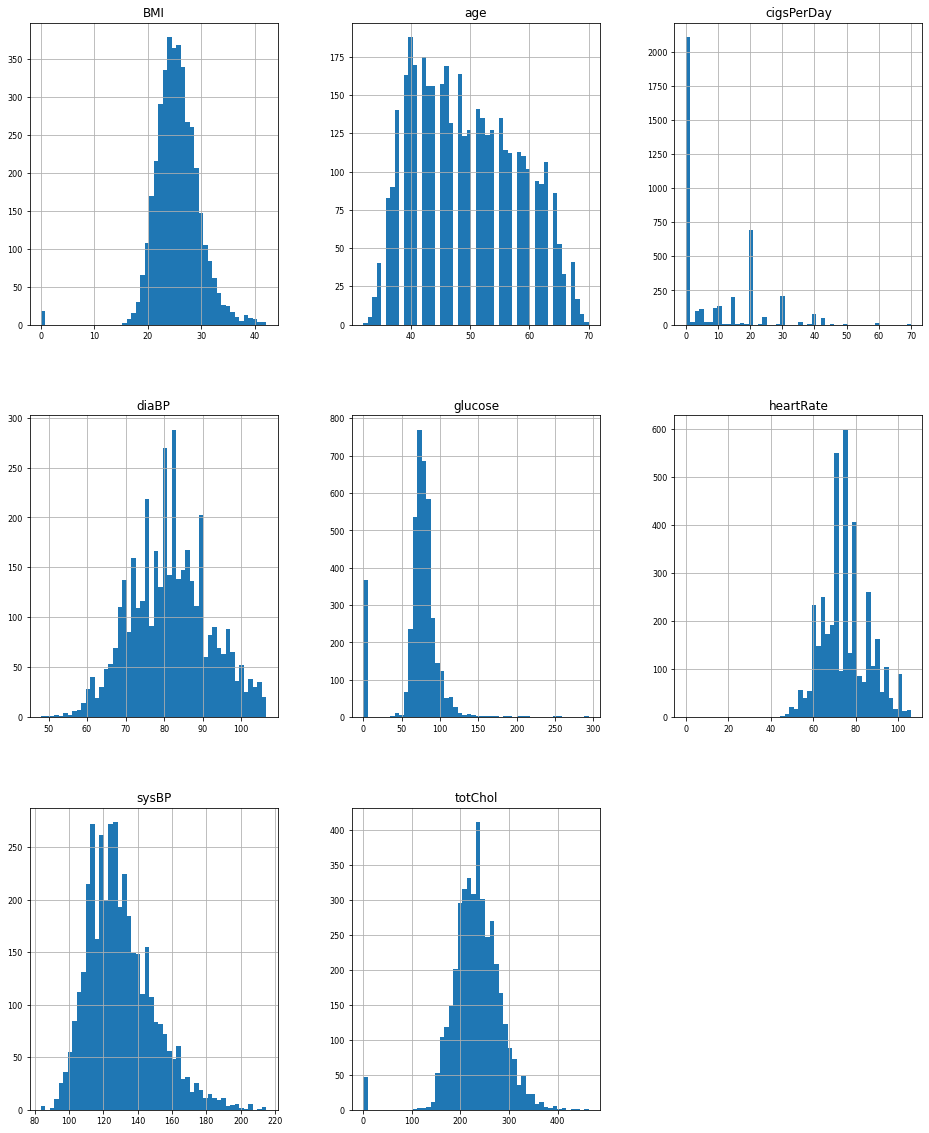

In [19]:
# Understanding numeric Distributions. 
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

The average BMI of the group is around 25 and the maximum number of people have a BMI between 23 to 28. This means that most of the people in the group are bordering on overweight to actually being overweight. 

Age of people in the study varies between 32 to 70 and the average age is around 50. So the people in the study are middle aged to old. 

Even though the average number of cigerattes smoked is 9, most upto 50% of the people did not smoke at all. One outlier smoked 70 cigerattes a day! 

A BP of a person is written as Systolic BP / Diastolic BP. Systolic BP means the blood pressure when the heart beats. Diastolic BP means the blood pressure when the heart is resting. Average BP is 132/82 (indicates hypertension). 

The average Glucose levels is 82 and it varies between 71 to 87 which means none of them are diabetic at the moment. 

Average heart rate is 76 with the maximum number of people between 68 to 83. An outlier has a heart rate of 143. 

Most people have a cholesterol levels of 206 to 263, with average being 237. This indicates Borderline high to high cholesterol level.

#### Bar Plot & Line Graphs

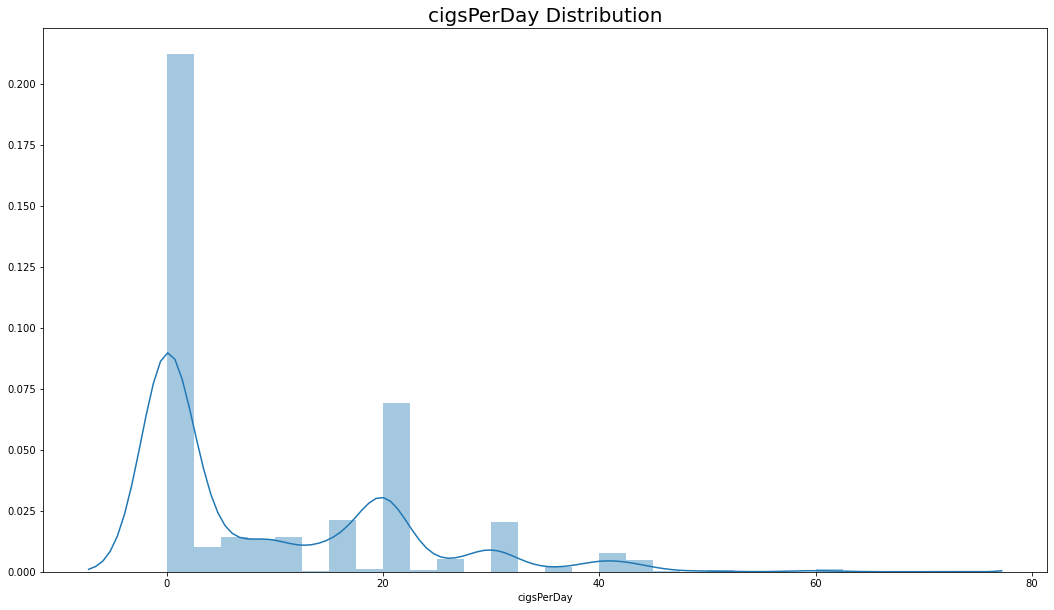

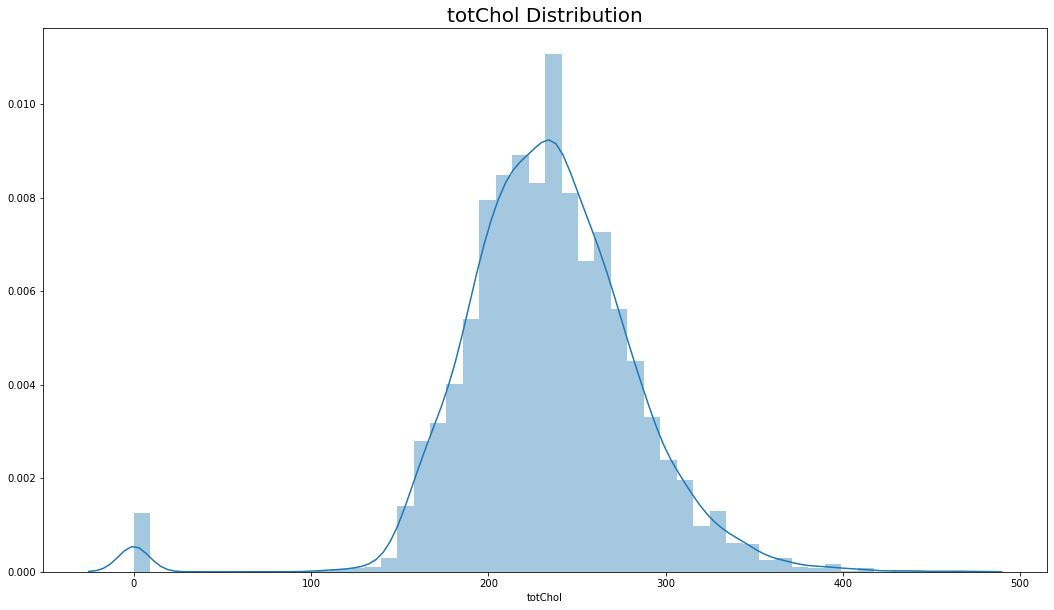

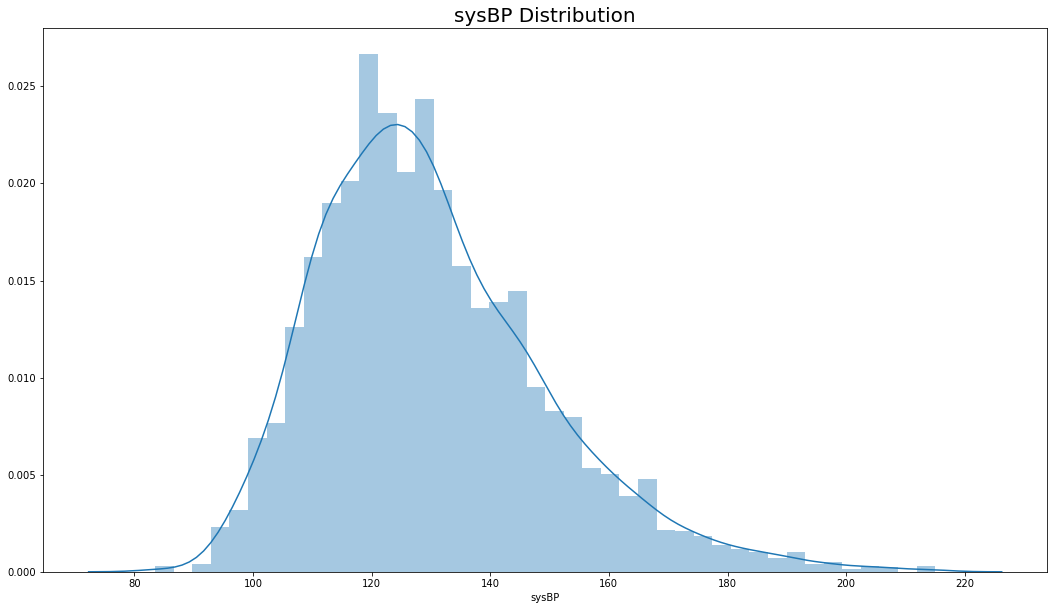

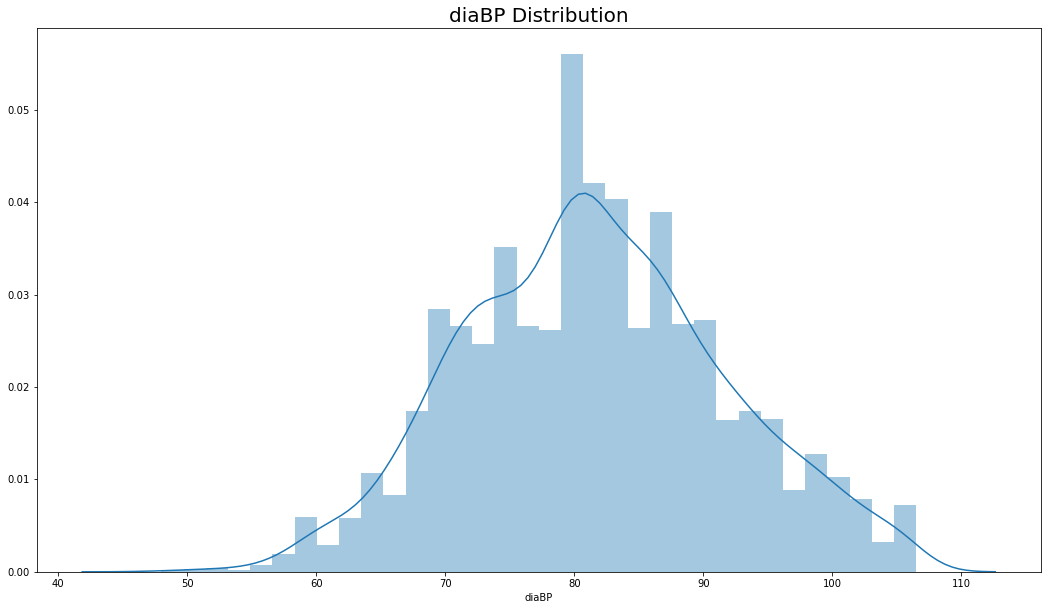

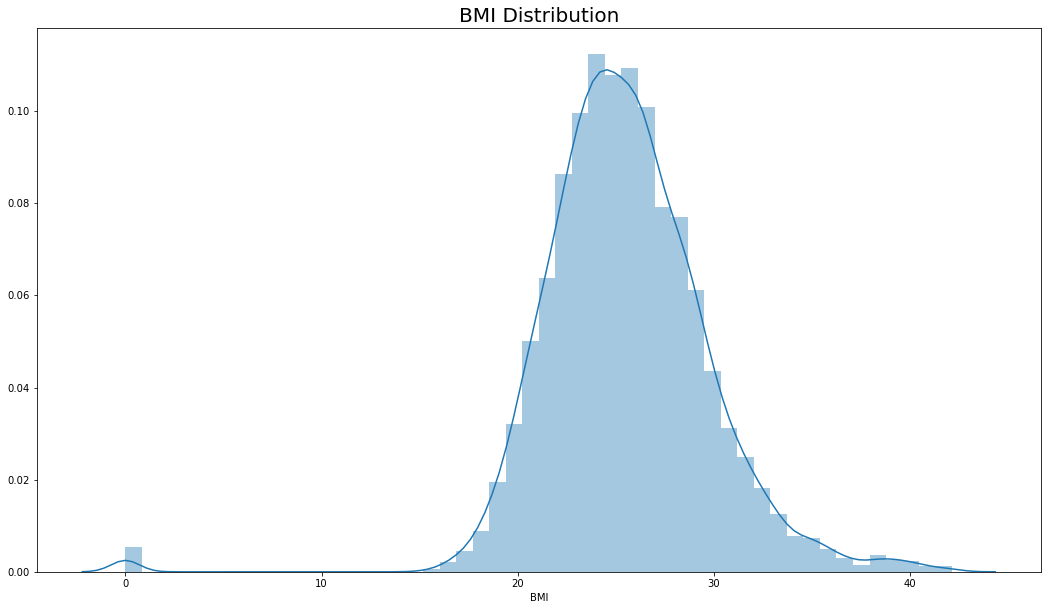

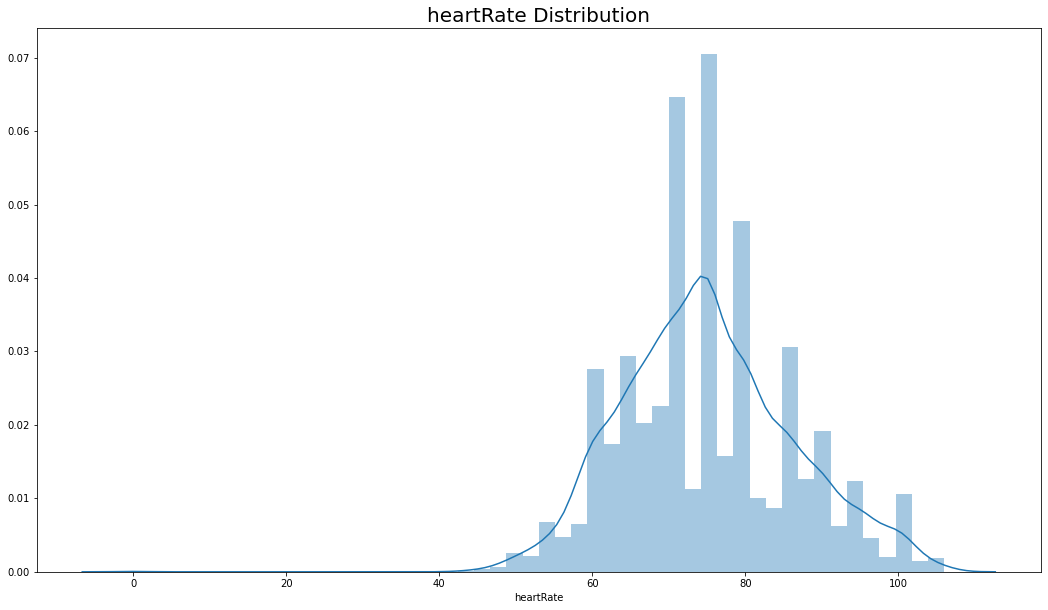

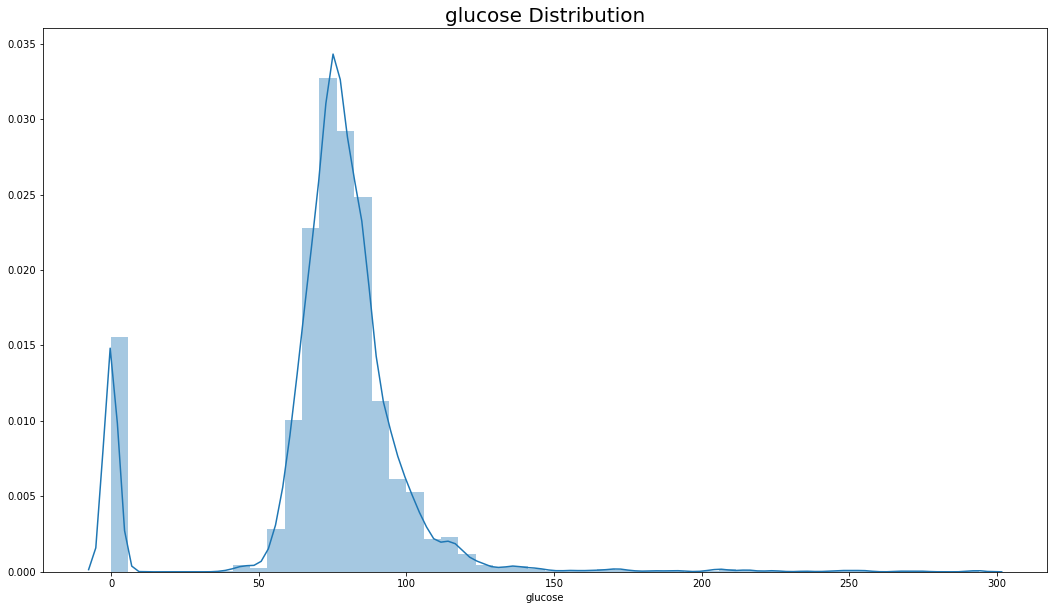

In [20]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sb.distplot(data[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Cigarettes per day are not normally distributed. It is because most people are not smokers. 

Total Cholesterol, systolic BP, diastolic BP, BMI are normally distributed. 

Glucose is not normally distributed. That might be because we have blank values in glucose column. 

### Correlation Plot 

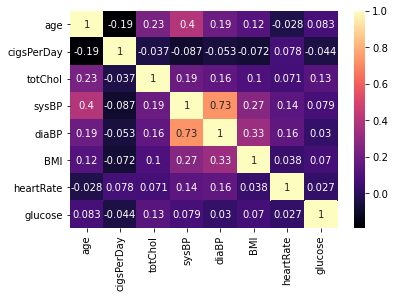

In [21]:
sb.heatmap(data_num.corr(), annot = True, cmap = "magma")

Systolic BP & Diastolic BP are highly correlated to each other. 

Systolic BP & Diastolic BP each are mildly correlated to BMI (Body Mass Index). 

Systolic BP & Age are mildly correlated to each other.

### Categorical Variables 

#### Bar Graph

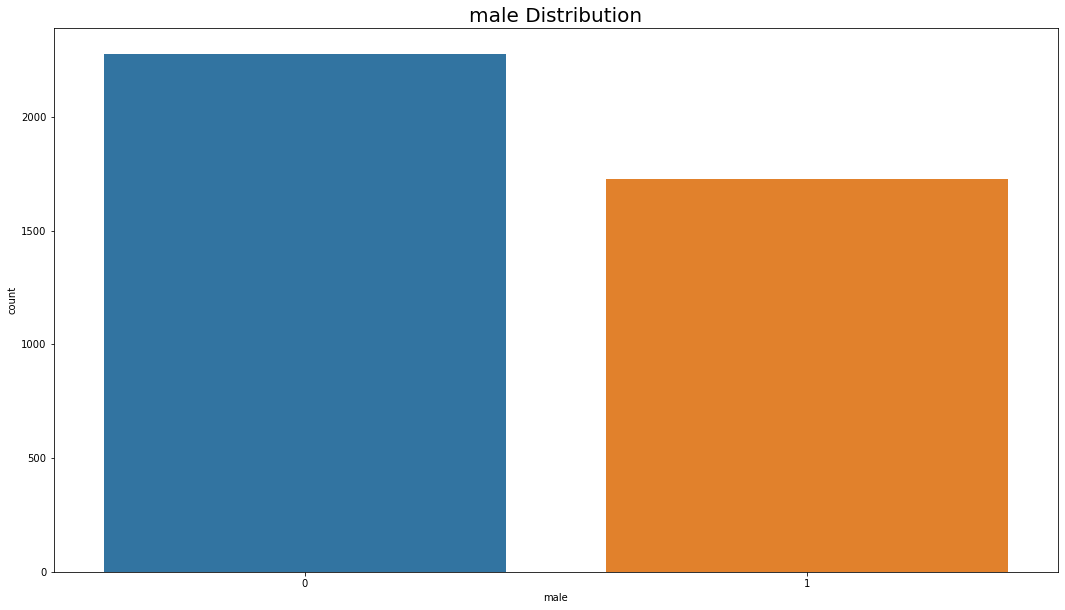

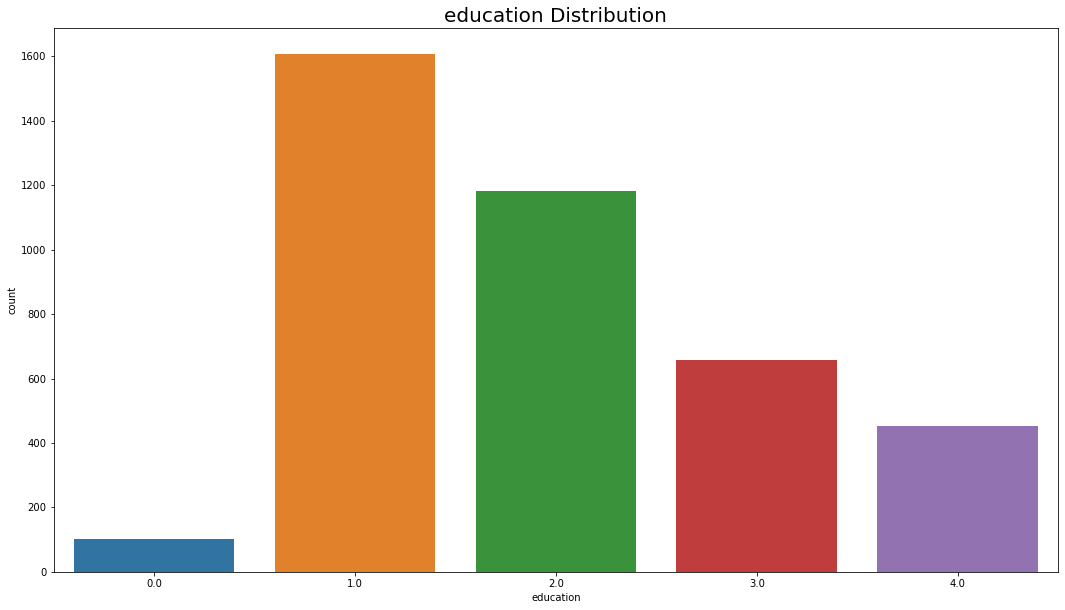

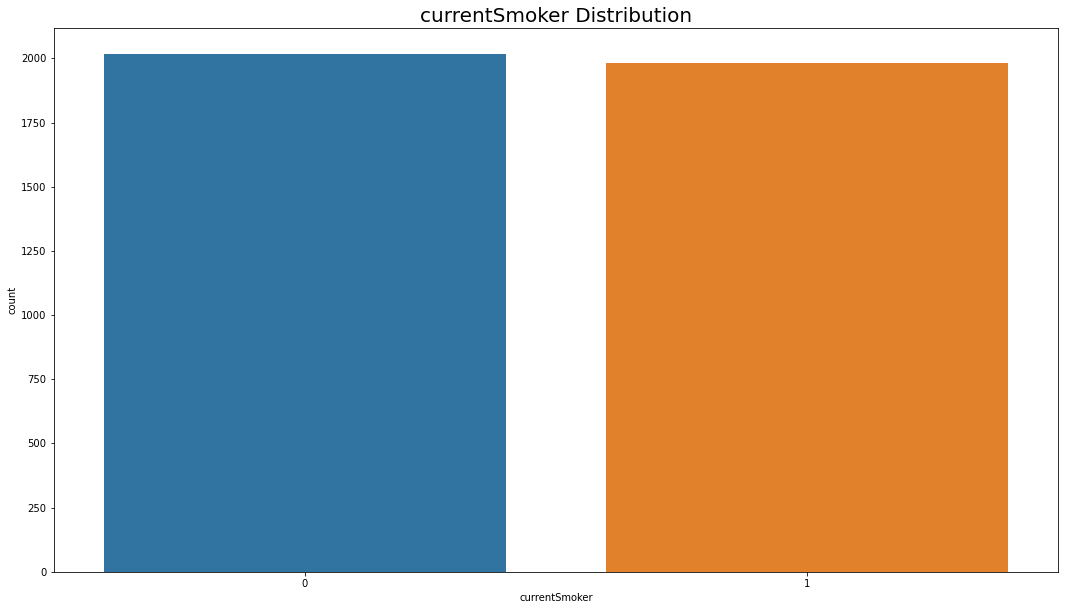

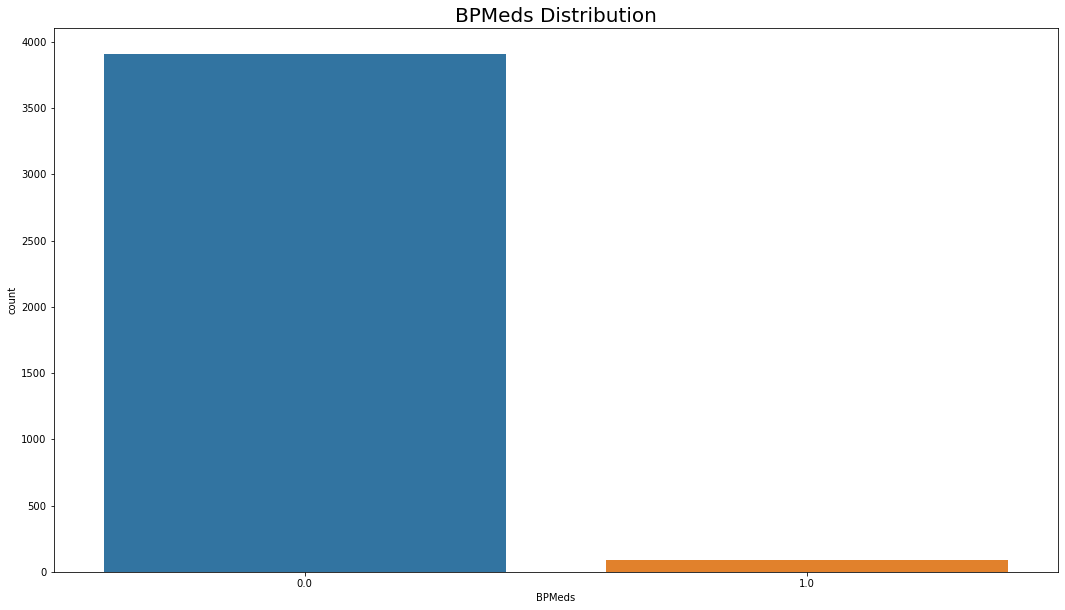

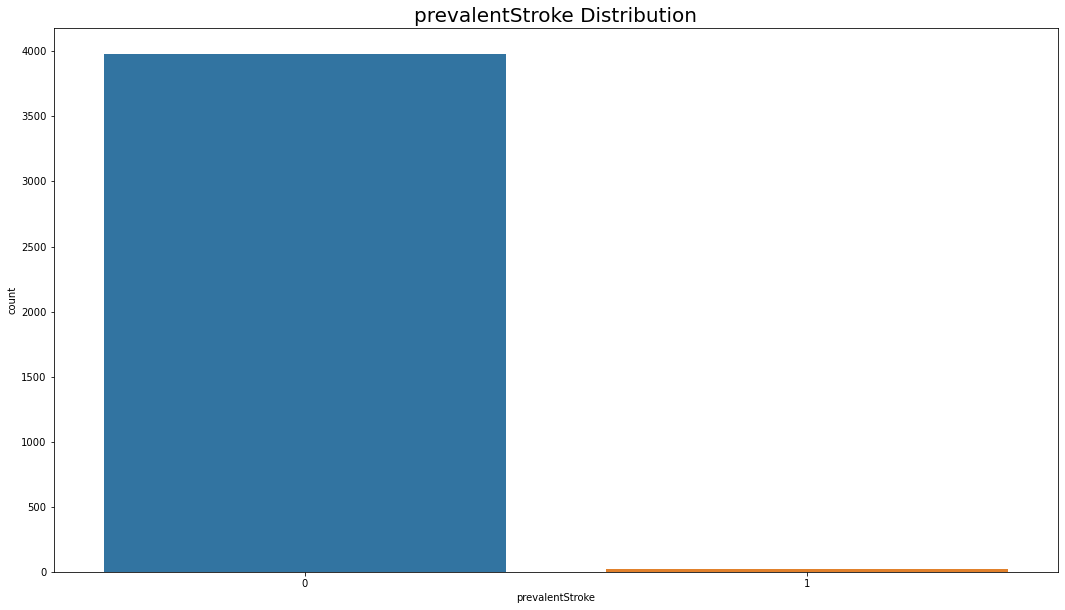

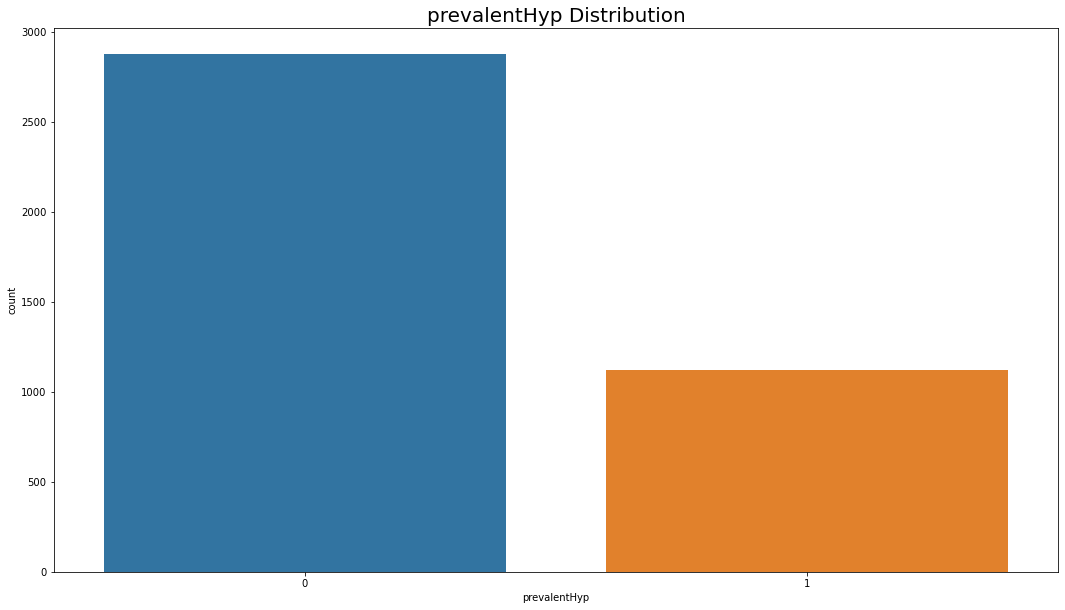

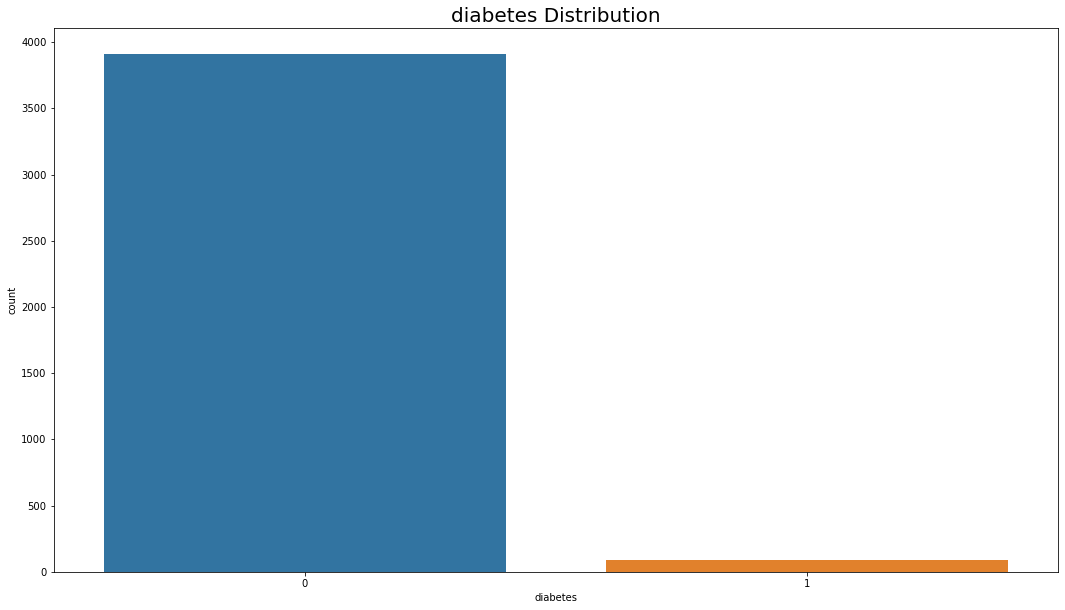

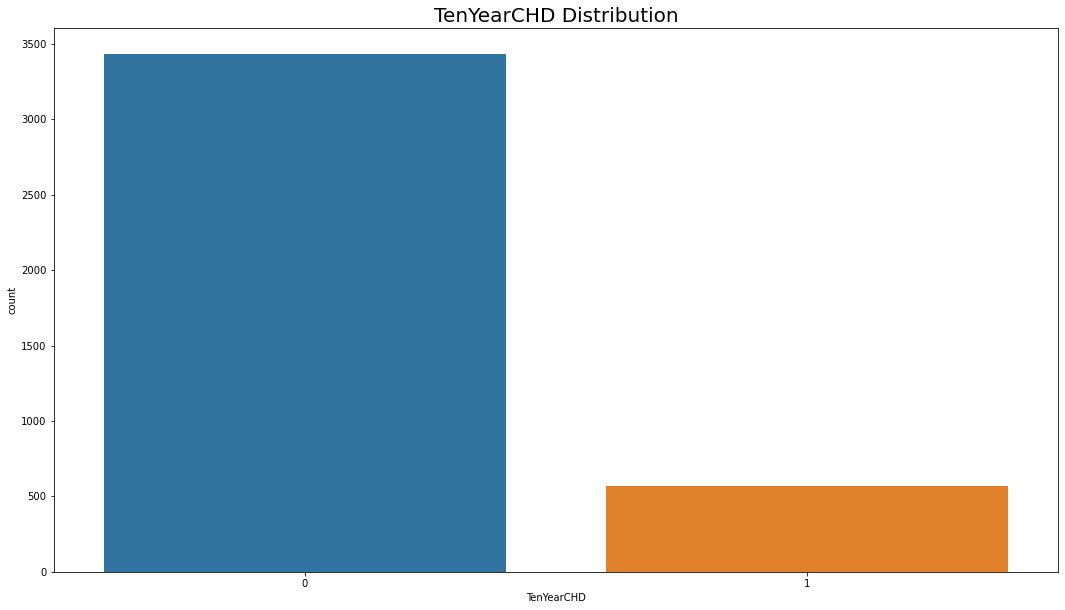

In [22]:
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
for feature in categorical_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sb.countplot(data[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

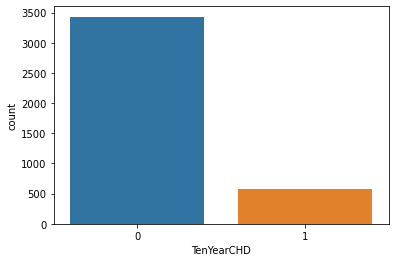

In [23]:
sb.countplot(data = data, x = "TenYearCHD")

Based on the box plots, it looks like the data is unbalanced. 

Around 53% of the people interviewed seems to be women. 

There seems to be an almost even split between the number of current smokers Vs current non-smokers. 

Almost 97% of the people do not take any medicines to control their BP. 

Around 99.5% of people in the study have not had a stroke before. 

69% of the people are not suffering from hypertension and 97% do not have diabetes. 

85% of the people interviewed have a very low risk of getting a coronary heart issue.

## EDA Conclusions

<u> Summary of Study Group </u> : The study consists of 4,240 borderline-overweight Middle-Aged to Older patients, with the sex ratio slightly skewed towards Women, consisting of an almost even split between smokers and non-smokers. There are no diabetics in the group, and  only 25 people or 0.6% of the study group have had a history of strokes. Everyone in the study has high cholestrol levels.


<u> Results of EDA </u> : 85% of people are at a very low risk of heart failure by the end of 10 years. Older Women are more at risk of heart attacks. 

<u> Data Insights </u> :
1. Data is unbalanced. 

2. Education level does not seem to be related to the heart risk. If we had any data related to their occupation, then it might provide context to analyse the education data Vs Heart Risk. 

3. Systolic BP & Diastolic BP are highly correlated to each other.

## Feature Selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

1. Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
2. Improves Accuracy: Less misleading data means modeling accuracy improves.
3. Reduces Training Time: Less data means that algorithms train faster.

There are many ways to do feature selection - Univariate Feature Selection, Recursive Feature Selection, Model Feature Selection. I am using Univariate Feature Selection as it checks how each feature affects the predicted variable.

In [3]:
# call packages
from sklearn.feature_selection import SelectKBest, chi2

In [25]:
# separate the independent columns
x = data.iloc[:, 0:14]

# separate the dependent column
y = data.iloc[:, 15]

In [26]:
x.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0


In [27]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: object

In [28]:
# Using SelectKBest to extract top 10 features
topfeatures = SelectKBest(score_func = chi2, k = 10)
fit = topfeatures.fit(x, y)
xyscore = pd.DataFrame(fit.scores_)
xycolumn = pd.DataFrame(x.columns)

In [29]:
# Concatenate both data frames to get features and scores
featurescore = pd.concat([xycolumn, xyscore], axis = 1)

# rename columns featurescore dataframe
featurescore.columns = ["Feature", "Score"]

In [30]:
# Sort the featurescore by higest-to-lowest scores
featurescore = featurescore.sort_values(by = "Score", ascending= False)
featurescore

,Feature,Score
10,sysBP,395.546167
1,age,299.575684
4,cigsPerDay,229.785339
9,totChol,133.841937
7,prevalentHyp,70.792499
11,diaBP,48.993454
8,diabetes,21.045644
5,BPMeds,19.824866
0,male,18.670139
6,prevalentStroke,17.592617


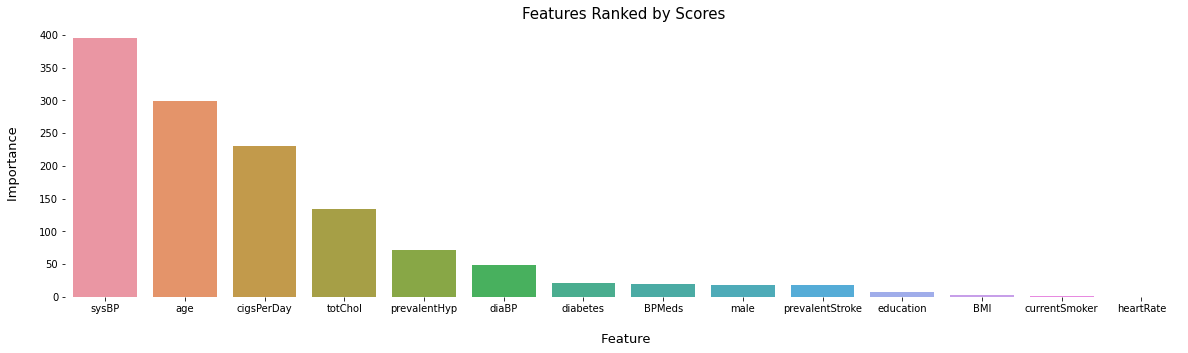

In [31]:
# Plotting the Features based on Scores
plt.figure(figsize= (20,5))
sb.barplot(x = "Feature", y = "Score", data = featurescore)
plt.box(False)
plt.title("Features Ranked by Scores", fontsize = 15)
plt.xlabel("\n Feature", fontsize = 13)
plt.ylabel("Importance \n", fontsize = 13)
plt.xticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

In [32]:
# Selecting thr 10 most important features
features_list = featurescore["Feature"].tolist()[:10]
features_list

['sysBP',
 'age',
 'cigsPerDay',
 'totChol',
 'prevalentHyp',
 'diaBP',
 'diabetes',
 'BPMeds',
 'male',
 'prevalentStroke']

## <u>Most Important Features</u>

The most important features that affect the 10-year Heart Risk factor:

1. Systolic BP
2. Age
3. Cigerattes Per Day
4. Total Cholestoral
5. Prevalent Hypertension
6. Diastolic BP
7. Diabetics
8. BP Medicines
9. Sex
10. Prevalent Stroke

The features to be ignored are education, BMI, heart rate and current smoker. We did not have any information about education to begin with and EDA analysis supported the fact that education was not a relavent factor. BMI seemed important at first glance but I will go with Univariate Feature Selection Analysis results. Same for heart rate and current smoker. 

I will only be using these factors for all further analysis.

## New Dataset with Selected Features

In [33]:
data = data[["male", "age", "cigsPerDay", "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP", "TenYearCHD"]]
data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,0


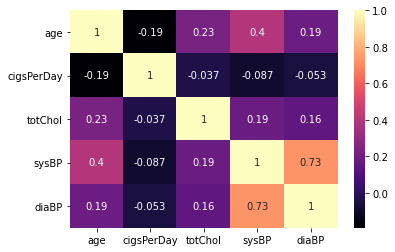

In [34]:
sb.heatmap(data.corr(), annot = True, cmap = "magma")

This still shows a very strong correlation between systolic BP and diastolic BP, which makes sense.

### Scaling Data

Since each of the features that affect Ten-YearCHD are on different scales, which leads to data models giving certain features undue importance. Scaling the data brings all the columns onto the same level. 

There are different ways to scale data, like Standard Scaler, MaxAbs Scaler, MinMax Scaler and Robust Scaler. Let's take a look at each one. 

1. <u>Standard Scaler</u>: StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.StandardScaler results in a distribution with a standard deviation equal to 1 and the mean becomes 0. 

2. <u>MinMax Scaler</u>: For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. (Range = original maximum - original minimum). MinMaxScaler preserves the shape of the original distribution and is used as it does not reduce the significance of outliers. 

3. <u>MaxAbs Scaler</u>: MaxAbs Scaler works exactly like MinMax Scaler if all the features are positive. If any of the features are negative, then MaxAbs Scaler considers the absolute values and plots them against a range of 0 to 1. 

4. <u>Robust Scaler</u>: Robust Scaler transforms each feature by subtracting the median and then dividing the interquartile range (Interquartile Range = 75th percentile value - 25th percentile value). Robust Scaler reduces the effect of outliers and it does not scale data into a predetermined interval. 

I will be using MinMax Scaler as the Framingham data is sensitive to outliers, captures very small deviations of featuers and preserves zero entries in sparse data. 

In [35]:
# Calling packages

from sklearn.preprocessing import MinMaxScaler 

In [36]:
# Create scaler
scaler = MinMaxScaler()

# create scaled data
data_scaled = pd.DataFrame(scaler.fit_transform (data), columns = data.columns)

# view scaled data
data_scaled.describe()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,TenYearCHD
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,0.431142,0.458063,0.128236,0.022994,0.005499,0.280430,0.022494,0.502859,0.354346,0.573596,0.142214
std,0.495298,0.225818,0.170211,0.149904,0.073958,0.449265,0.148303,0.107946,0.146717,0.173258,0.349314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.441810,0.247148,0.444444,0.000000
50%,0.000000,0.421053,0.000000,0.000000,0.000000,0.000000,0.000000,0.502155,0.334601,0.564103,0.000000
75%,1.000000,0.631579,0.285714,0.000000,0.000000,1.000000,0.000000,0.564655,0.437262,0.683761,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

### Divide Train & Test Data 

Divide data into train and test data with a 75-25 split first. 

In [37]:
# Create X and Y data

x = data_scaled.drop(["TenYearCHD"], axis = 1)
y = data_scaled["TenYearCHD"]

# Data Split library 
from sklearn.model_selection import train_test_split

In [121]:
# 75-25 Split 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [122]:
len(X_train)

3200

In [123]:
len(X_test)

801

### Balancing & Modelling The Dataset

The dataset is very imbalanced as only 15% of the sampled population are at risk of developing heart risk at the end of 10 years. The problem with imbalanced dataset The most common methods are - oversampling and undersampling 

<u>Oversampling</u> — Duplicating samples from the minority class. Seeking a balanced distribution for a severely imbalanced dataset can cause affected algorithms to overfit the minority class, leading to increased generalization error.

<u>Undersampling</u> — Deleting samples from the majority class. This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset.A limitation of undersampling is that examples from the majority class are deleted that may be useful, important, or perhaps critical to fitting a robust decision boundary. This can lead to underfit. 


Importantly, the change to the class distribution is only applied to the training dataset. The intent is to influence the fit of the models. The resampling is not applied to the test or holdout dataset used to evaluate the performance of a model.

In [41]:
#Installing imbalanced-learn
#pip install -U imbalanced-learn

##### SMOTE

SMOTE is Synthetic Minority Oversampling TEchnique. Oversampling duplicates existing minority class values. But SMOTE draws lines between existing minority class members and creates brand new minority members between the existing ones. Usually SMOTE and Undersampling are used together to prepare the Train dataset. 

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 2)

In [43]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [44]:
len(X_train)

5136

In [45]:
len(y_train)

5136

### Modelling & Evaluation 

The metrics to be used to determine the best models are: 

1. <b>Confusion Matrix</b> - It is a 2x2 or sometimes nxn matrix that gives the values of the predicted vs actual. 
Abbreviations to be used: 

a. True Positive = TP (the actual value (y_actual) is 1 and the predicted value (y_pred) is 1 as well)

b. True Negative = TN (the actual value (y_actual) is 0 and the predicted value (y_pred) is 0 as well)

c. False Positive = FP (the actual value (y_actual) is 0 but the predicted value (y_pred) is 1)

d. False Negative = FN (the actual value (y_actual) is 1 but the predicted value (y_pred) is 0)

1. <b>Accuracy</b> - Accuracy predicts how accurately the y_predict matches the y_actual values. The closer the accuracy of the model is to 100%, the better the model. It is mathematically calculated as 

<i>Accuracy = (TP + TN)/ Total </i>

2. <b>Precision Score</b> - Precision is the ratio of True positives vs predicted positives. The lesser the number of False Positives, the better the values. It is calculated as 

<i>Precision = TP / (TP + FP) </i>

3. <b>Recall Score / Sensitivity</b> - Recall is the ratio of true positives vs actual positives. The lesser the number of False Negatives, the better the recall score. It is calculated as

<i>Recall/ Sensitivity = TP / (TP + FN) </i>

4. <b>F1 Score</b> - It combines Recall and Precision scores. The closer the F1 score is to 100%, better the model. 

<i> F1 Score = 2 / ((1/Recall) + (1/Precision))
    
    5. <b>ROC Curve</b> - ROC (Receiver Operating Characteristics) curve is a visualization of the model output in terms of False Positive Rate (FPR = FP / (FP + TN)) on the x-axis and True Postive Rate (TPR = TP / (TP + FN)) on the y-axis. 
    
    6. <b>AUC (Area Under Curve) </b> - Area under curve represents degrees or measurements of separability. The higher the AUC, the better the model is at predicting 0s correctly as 0s and 1s as 1s. 
    
    AUC thumb rule: 
    
       a. 0.9 - 1: excellent
       b. 0.8 - 0.9: good
       c. 0.7 - 0.8: fair
       d. 0.6 - 0.7: poor
       e. 0.5 - 0.6: fail

In [46]:
# importing scikit-learn package. it is also called sklearn
# pip install -U scikit-learn

In [106]:
# Calling Evaluation Libraries 

import sklearn
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

#### <u>Logistic Regression</u> 

A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.It is a very common statistical model used to determine if an independent variable has an effect on a binary dependent variable. The sigmoid fuction compresses the values to lie between 0 to 1.

Confusion Matrix: 
 [[572 292]
 [ 36 101]]


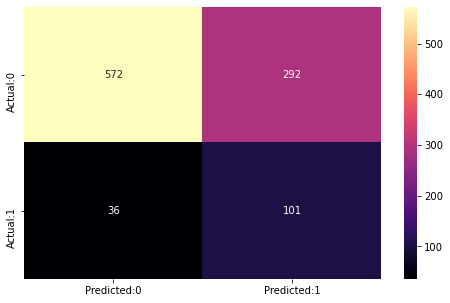

In [50]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_pred = model_svm.predict(X_test)

# Accuracy of Model 
acc_lr = accuracy_score(y_test, model_lr_pred)
print(f"The Accuracy score for Logistic Regression Model is: {round(acc_lr,3)*100}%")

# F1 Score
f1_lr = f1_score(y_test, model_lr_pred)
print(f"The f1 score for Logistic Regression Model is: {round(f1_lr, 3)*100}%")

# Precision Score
prec_lr = precision_score(y_test, model_lr_pred)
print(f"The precision for Logistic Regression Model is: {round(prec_lr, 3)*100}%")

# Recall/ Sensitivity
recall_lr = recall_score(y_test, model_lr_pred)
print(f"The sensitivity for Logistic Regression Model is: {round(recall_lr, 3)*100}%")

# Confusion Matrix for test
confmat_lr = confusion_matrix(y_test, model_lr_pred)
print(f"Confusion Matrix:", "\n", confmat_lr)

# Plotting Confusion Matrix
conf_matrix_lr = pd.DataFrame(data=confmat_lr,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sb.heatmap(pd.DataFrame(conf_matrix_lr), annot = True, cmap = "magma", fmt = "g")

In [52]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_lr_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Area Under Curve (AUC)
auc_lr = roc_auc_score(y_test, model_lr_pred)
print(f"The Area Under Curve is {round(auc_lr, 3)*100}%")

The Area Under Curve is 70.0%


The evaluation metrics are not encouraging. A 67% accuracy, 38% F1 Score and AUC of 70% are not encouraging. 

#### <u>SVM (Support Vector Machine)</u> 

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. The values lie between -1 to 1. 

Confusion Matrix: 
 [[583 281]
 [ 53  84]]


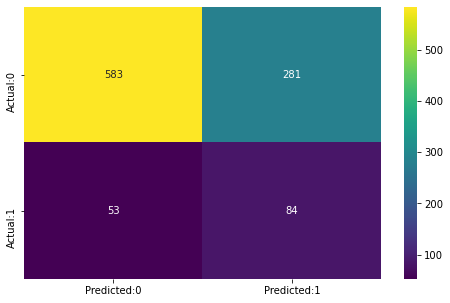

In [64]:
from sklearn.svm import SVC
model_svm = SVC().fit(X_train, y_train)
model_svm_pred = model_svm.predict(X_test)

# Accuracy of Model 
acc_svm = accuracy_score(y_test, model_svm_pred)
print(f"The Accuracy score for SVM Model is: {round(acc_svm,3)*100}%")

# F1 Score
f1_svm = f1_score(y_test, model_svm_pred)
print(f"The f1 score for SVM Model is: {round(f1_svm, 3)*100}%")

# Precision Score
prec_svm = precision_score(y_test, model_svm_pred)
print(f"The precision for SVM Model is: {round(prec_svm, 3)*100}%")

# Recall/ Sensitivity
recall_svm = recall_score(y_test, model_svm_pred)
print(f"The sensitivity for SVM Model is: {round(recall_svm, 3)*100}%")

# Confusion Matrix for test
confmat_svm = confusion_matrix(y_test, model_svm_pred)
print(f"Confusion Matrix:", "\n", confmat_svm)

# Plotting Confusion Matrix
conf_matrix_svm = pd.DataFrame(data=confmat_svm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sb.heatmap(pd.DataFrame(conf_matrix_svm), annot = True, cmap = "viridis", fmt = "g")

In [61]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_svm_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for SVM')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Area Under Curve (AUC)
auc_svm = roc_auc_score(y_test, model_svm_pred)
print(f"The Area Under Curve is {round(auc_svm, 3)*100}%")

The Area Under Curve is 64.4%


The SVM model does not show promising results as well. The accuracy is 66%, F1 score is 33% and AUC is 64.4%

#### <u>Decision Tree</u> 

A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. A decision tree is drawn upside down with its root at the top. One advantage of decision trees is that they provide a clear indication of which fields are most important to prediction or classification.

Confusion Matrix: 
 [[674 190]
 [ 87  50]]


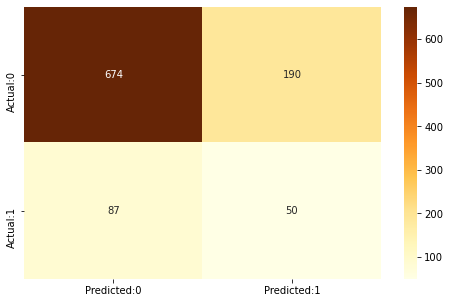

In [73]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(min_samples_split= 50, random_state= 2).fit(X_train, y_train)
model_dt_pred = model_dt.predict(X_test)

# Accuracy of Model 
acc_dt = accuracy_score(y_test, model_dt_pred)
print(f"The Accuracy score for Decision Tree Model is: {round(acc_dt,3)*100}%")

# F1 Score
f1_dt = f1_score(y_test, model_dt_pred)
print(f"The f1 score for Decision Tree Model is: {round(f1_dt, 3)*100}%")

# Precision Score
prec_dt = precision_score(y_test, model_dt_pred)
print(f"The precision for Decision Tree Model is: {round(prec_dt, 3)*100}%")

# Recall/ Sensitivity
recall_dt = recall_score(y_test, model_dt_pred)
print(f"The sensitivity for Logistic Regression Model is: {round(recall_dt, 3)*100}%")

# Confusion Matrix for test
confmat_dt = confusion_matrix(y_test, model_dt_pred)
print(f"Confusion Matrix:", "\n", confmat_dt)

# Plotting Confusion Matrix
conf_matrix_dt = pd.DataFrame(data=confmat_dt,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sb.heatmap(pd.DataFrame(conf_matrix_dt), annot = True, cmap = "YlOrBr", fmt = "g")

In [75]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_dt_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Decision Tree')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Area Under Curve (AUC)
auc_dt = roc_auc_score(y_test, model_dt_pred)
print(f"The Area Under Curve is {round(auc_dt, 3)*100}%")

The Area Under Curve is 57.3%


The Decision Tree model isnt performing upto expectations. Though the accuracy is better, compared to SVM or Logistic Regression Models, the AUC and F1 scores are very low. So tuning the parameters is the way to go.

#### <u>KNN (K Nearest Neighbor)</u> 

KNN - K Nearest Neighbor assumes that the similar points are neighbors- that is points with similar characteristics lie close to each other. One major advantage of KNN is that it is a non-parametric learning algorithm, that is - the algorithm starts out with no assumptions. 

The Accuracy score for KNN Model is: 65.60000000000001%
The f1 score for KNN Model is: 30.099999999999998%
The precision for KNN Model is: 20.8%
The sensitivity for KNN Model is: 54.0%
Confusion Matrix: 
 [[583 281]
 [ 63  74]]


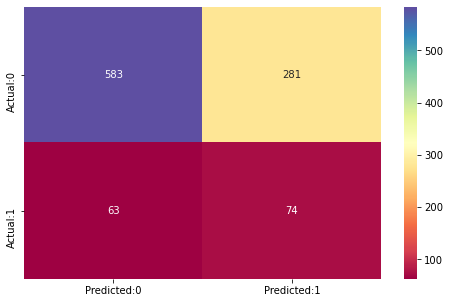

In [107]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
model_knn_pred = model_knn.predict(X_test)

# Accuracy of Model 
acc_knn = accuracy_score(y_test, model_knn_pred)
print(f"The Accuracy score for KNN Model is: {round(acc_knn,3)*100}%")

# F1 Score
f1_knn = f1_score(y_test, model_knn_pred)
print(f"The f1 score for KNN Model is: {round(f1_knn, 3)*100}%")

# Precision Score
prec_knn = precision_score(y_test, model_knn_pred)
print(f"The precision for KNN Model is: {round(prec_knn, 3)*100}%")

# Recall/ Sensitivity
recall_knn = recall_score(y_test, model_knn_pred)
print(f"The sensitivity for KNN Model is: {round(recall_knn, 3)*100}%")

# Confusion Matrix for test
confmat_knn = confusion_matrix(y_test, model_knn_pred)
print(f"Confusion Matrix:", "\n", confmat_knn)

# Plotting Confusion Matrix
conf_matrix_knn = pd.DataFrame(data=confmat_knn,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sb.heatmap(pd.DataFrame(conf_matrix_knn), annot = True, cmap = "Spectral", fmt = "g")

The Area Under Curve is 60.699999999999996%


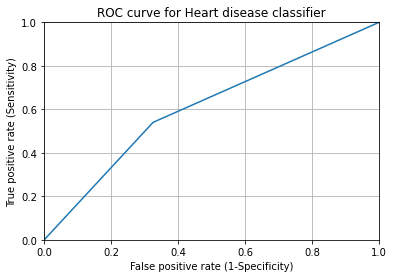

In [102]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_knn_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for KNN')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Area Under Curve (AUC)
auc_knn = roc_auc_score(y_test, model_knn_pred)
print(f"The Area Under Curve is {round(auc_knn, 3)*100}%")

KNN model has an accuracy of 66%, F1 score of 30% and AUC of 61%. 

#### <u>Random Forest </u> 

Random forest is an ensemble of a large number of relatively uncorrelated trees, each of which make their own decisions. The advantage of this is that, each tree is unbiased by the output or workings of the other, moving the decision in an overall right way. 

The Accuracy score for Random Forest Model is: 75.0%
The f1 score for Random Forest Model is: 32.800000000000004%
The precision for Random Forest Model is: 26.0%
The sensitivity for Random Forest Model is: 44.5%
Confusion Matrix: 
 [[690 174]
 [ 76  61]]


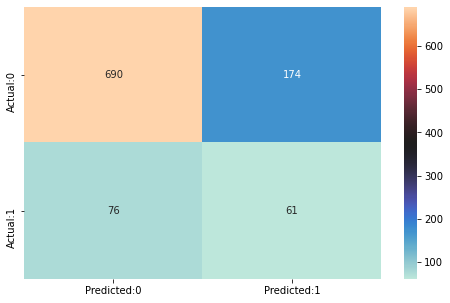

In [100]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 55, max_depth = 12).fit(X_train, y_train)
model_rf_pred = model_rf.predict(X_test)

# Accuracy of Model 
acc_rf = accuracy_score(y_test, model_rf_pred)
print(f"The Accuracy score for Random Forest Model is: {round(acc_rf,3)*100}%")

# F1 Score
f1_rf = f1_score(y_test, model_rf_pred)
print(f"The f1 score for Random Forest Model is: {round(f1_rf, 3)*100}%")

# Precision Score
prec_rf = precision_score(y_test, model_rf_pred)
print(f"The precision for Random Forest Model is: {round(prec_rf, 3)*100}%")

# Recall/ Sensitivity
recall_rf = recall_score(y_test, model_rf_pred)
print(f"The sensitivity for Random Forest Model is: {round(recall_rf, 3)*100}%")

# Confusion Matrix for test
confmat_rf = confusion_matrix(y_test, model_rf_pred)
print(f"Confusion Matrix:", "\n", confmat_rf)

# Plotting Confusion Matrix
conf_matrix_rf = pd.DataFrame(data=confmat_rf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sb.heatmap(pd.DataFrame(conf_matrix_rf), annot = True, cmap = "icefire", fmt = "g")

The Area Under Curve is 62.2%


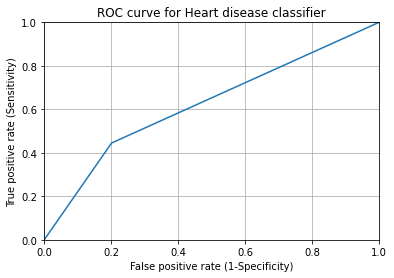

In [101]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_rf_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Area Under Curve (AUC)
auc_rf = roc_auc_score(y_test, model_rf_pred)
print(f"The Area Under Curve is {round(auc_rf, 3)*100}%")

Random Forest has AUC of 62.2%, Accuracy of 75% and F1 score of 33%. 

#### <u> Gradient Boosting </u>

Boosting is a method of converting weak learners into strong learners. Weak learners here means decision trees. Gradient Boosting trains many models in a gradual, additive and sequential manner. XGB involves 3 elements - a loss function to be optimized, a weak learner to make predictions and an additive model to add the weak learners to minimize the loss function.

The Accuracy score for Gradient Boosting Model is: 73.5%
The f1 score for Gradient Boosting Model is: 32.9%
The precision for Gradient Boosting Model is: 25.2%
The sensitivity for Gradient Boosting Model is: 47.4%
Confusion Matrix: 
 [[671 193]
 [ 72  65]]


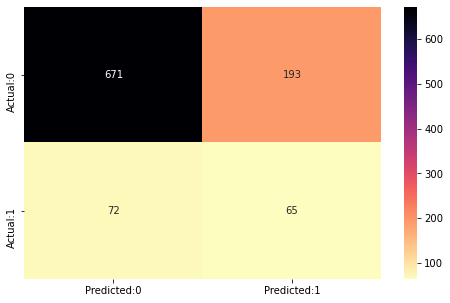

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(random_state = 55).fit(X_train, y_train)
model_gb_pred = model_gb.predict(X_test)

# Accuracy of Model 
acc_gb = accuracy_score(y_test, model_gb_pred)
print(f"The Accuracy score for Gradient Boosting Model is: {round(acc_gb,3)*100}%")

# F1 Score
f1_gb = f1_score(y_test, model_gb_pred)
print(f"The f1 score for Gradient Boosting Model is: {round(f1_gb, 3)*100}%")

# Precision Score
prec_gb = precision_score(y_test, model_gb_pred)
print(f"The precision for Gradient Boosting Model is: {round(prec_gb, 3)*100}%")

# Recall/ Sensitivity
recall_gb = recall_score(y_test, model_gb_pred)
print(f"The sensitivity for Gradient Boosting Model is: {round(recall_gb, 3)*100}%")

# Confusion Matrix for test
confmat_gb = confusion_matrix(y_test, model_gb_pred)
print(f"Confusion Matrix:", "\n", confmat_gb)

# Plotting Confusion Matrix
conf_matrix_gb = pd.DataFrame(data=confmat_gb,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sb.heatmap(pd.DataFrame(conf_matrix_gb), annot = True, cmap = "magma_r", fmt = "g")

The Area Under Curve is 62.6%


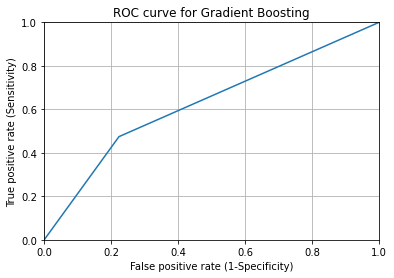

In [105]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_gb_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Gradient Boosting')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Area Under Curve (AUC)
auc_gb = roc_auc_score(y_test, model_gb_pred)
print(f"The Area Under Curve is {round(auc_gb, 3)*100}%")

Gradient Boosting has accuracy of 74%, F1 score of 33% and AUC of 63%. 

### Hyperparameter Tuning for best Classifier

A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. By training a model with existing data, we are able to fit the model parameters. However, there is another kind of parameters, known as Hyperparameters, that cannot be directly learned from the regular training process. They are usually fixed before the actual training process begins. These parameters express important properties of the model such as its complexity or how fast it should learn.

The 2 methods used are: 

1. GridSearchCV - This approach is called GridSearchCV, because it searches for best set of hyperparameters from a grid of hyperparameters values. Since it goes through all the intermediate combinations of hyperparameters which makes grid search computationally very expensive.

2. RandomizedSearchCV - RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in random fashion to find the best set hyperparameters. This approach reduces unnecessary computation.


#### Using Randomized Search Cross Validation

<u>Random Forest </u>

In [109]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [112]:
# Creating RF model
rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator= rf, param_distributions= random_grid, n_iter= 150, cv = 5, verbose= 3, 
                               random_state= 10, n_jobs= -1)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 23.5min finished


The Accuracy score for Random Forest Model is: 78.5%
The f1 score for Random Forest Model is: 25.6%
The precision for Random Forest Model is: 24.3%
The sensitivity for Random Forest Model is: 27.0%
Confusion Matrix: 
 [[749 115]
 [100  37]]


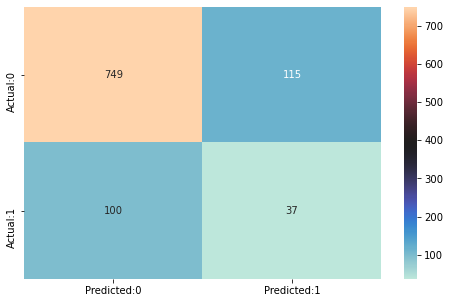

In [113]:
from sklearn.ensemble import RandomForestClassifier
model_rf = rf_random.fit(X_train, y_train)
model_rf_pred = model_rf.predict(X_test)

# Accuracy of Model 
acc_rf = accuracy_score(y_test, model_rf_pred)
print(f"The Accuracy score for Random Forest Model is: {round(acc_rf,3)*100}%")

# F1 Score
f1_rf = f1_score(y_test, model_rf_pred)
print(f"The f1 score for Random Forest Model is: {round(f1_rf, 3)*100}%")

# Precision Score
prec_rf = precision_score(y_test, model_rf_pred)
print(f"The precision for Random Forest Model is: {round(prec_rf, 3)*100}%")

# Recall/ Sensitivity
recall_rf = recall_score(y_test, model_rf_pred)
print(f"The sensitivity for Random Forest Model is: {round(recall_rf, 3)*100}%")

# Confusion Matrix for test
confmat_rf = confusion_matrix(y_test, model_rf_pred)
print(f"Confusion Matrix:", "\n", confmat_rf)

# Plotting Confusion Matrix
conf_matrix_rf = pd.DataFrame(data=confmat_rf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sb.heatmap(pd.DataFrame(conf_matrix_rf), annot = True, cmap = "icefire", fmt = "g")

The Area Under Curve is 56.8%


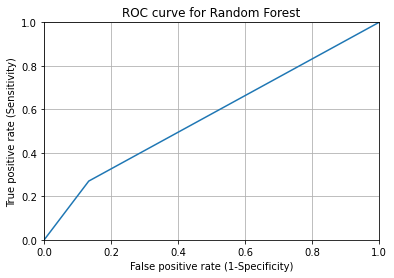

In [116]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_rf_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Area Under Curve (AUC)
auc_rf = roc_auc_score(y_test, model_rf_pred)
print(f"The Area Under Curve is {round(auc_rf, 3)*100}%")

<u>Gradient Boosting </u>

In [114]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [115]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=75, scoring='f1', 
                              cv=2, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 33.9min finished


The Accuracy score for Gradient Boosting Model is: 81.2%
The f1 score for Gradient Boosting Model is: 27.700000000000003%
The precision for Gradient Boosting Model is: 29.299999999999997%
The sensitivity for Gradient Boosting Model is: 26.3%
Confusion Matrix: 
 [[777  87]
 [101  36]]


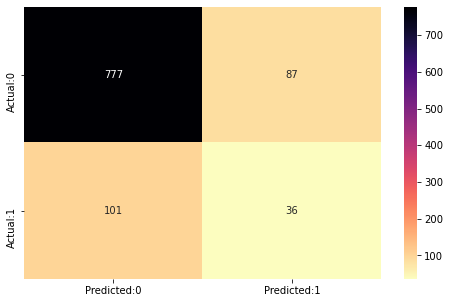

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = gb_random.fit(X_train, y_train)
model_gb_pred = model_gb.predict(X_test)

# Accuracy of Model 
acc_gb = accuracy_score(y_test, model_gb_pred)
print(f"The Accuracy score for Gradient Boosting Model is: {round(acc_gb,3)*100}%")

# F1 Score
f1_gb = f1_score(y_test, model_gb_pred)
print(f"The f1 score for Gradient Boosting Model is: {round(f1_gb, 3)*100}%")

# Precision Score
prec_gb = precision_score(y_test, model_gb_pred)
print(f"The precision for Gradient Boosting Model is: {round(prec_gb, 3)*100}%")

# Recall/ Sensitivity
recall_gb = recall_score(y_test, model_gb_pred)
print(f"The sensitivity for Gradient Boosting Model is: {round(recall_gb, 3)*100}%")

# Confusion Matrix for test
confmat_gb = confusion_matrix(y_test, model_gb_pred)
print(f"Confusion Matrix:", "\n", confmat_gb)

# Plotting Confusion Matrix
conf_matrix_gb = pd.DataFrame(data=confmat_gb,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sb.heatmap(pd.DataFrame(conf_matrix_gb), annot = True, cmap = "magma_r", fmt = "g")

The Area Under Curve is 58.099999999999994%


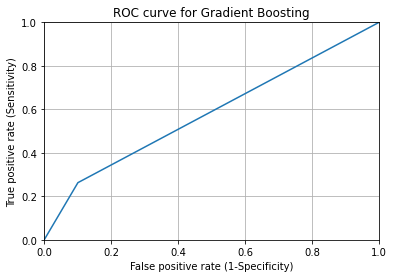

In [118]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_gb_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Gradient Boosting')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Area Under Curve (AUC)
auc_gb = roc_auc_score(y_test, model_gb_pred)
print(f"The Area Under Curve is {round(auc_gb, 3)*100}%")

#### Plotting ROC Characteristics of Each Model 

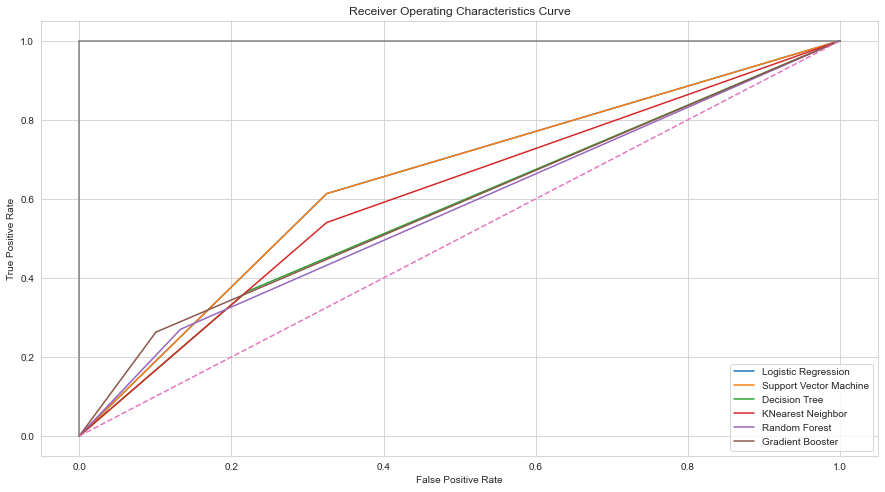

In [119]:
# FPR stands for False Positive Rate and TPR stands for True Positive Rate

# Creating the FPR & TPR for each model 

FPR_lr, TPR_lr, threshold_lr = roc_curve(y_test, model_lr_pred)
FPR_svm, TPR_svm, threshold_svm = roc_curve(y_test, model_svm_pred)
FPR_dt, TPR_dt, threshold_dt = roc_curve(y_test, model_dt_pred)
FPR_knn, TPR_knn, threshold_knn = roc_curve(y_test, model_knn_pred)
FPR_rf, TPR_rf, threshold_rf = roc_curve(y_test, model_rf_pred)
FPR_gb, TPR_gb, threshold_gb = roc_curve(y_test, model_gb_pred)

# Plotting the rates of each model 
sb.set_style("whitegrid")
plt.figure(figsize = (15,8), facecolor = "w")
plt.title("Receiver Operating Characteristics Curve")
plt.plot(FPR_lr, TPR_lr, label = "Logistic Regression")
plt.plot(FPR_svm, TPR_svm, label = "Support Vector Machine")
plt.plot(FPR_dt, TPR_dt, label = "Decision Tree")
plt.plot(FPR_knn, TPR_knn, label = "KNearest Neighbor")
plt.plot(FPR_rf, TPR_rf, label = "Random Forest")
plt.plot(FPR_gb, TPR_gb, label = "Gradient Booster")
plt.plot([0,1], ls = "--")
plt.plot([0,0], [1,0], c = "0.5")
plt.plot([1,1], c = "0.5")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()


## <u>Recommendations</u>

### Recommendations for Preventing or Reducing Chances of Heart Attack

The recommendations from the models show that there are 2 factors under our control to reduce chance of heart attack and 1 factor that is not. 

The 2 factors that we can control are: 

1. Systolic <u>BP</u> is one of the most important factor to determine risk of heart attack. So keeping BP in check is essential. 

2. The number of <u>cigarettes</u> smoked per day is directly proportionate to the probability of heart attack. So smoking kills!

The factor not under our control, that increases chance of heart attack is <u>Age</u>. As we age, the probability of getting a heart attack increases as well. So regular excercises and a healthy lifestyle is the only way to reduce chance of heart attack.



### Extrapolated applications of the model you build and its findings

1. The data overall, is highly imbalanced. Additional data, especially for the minority class will improve the accuracy of prediction.


2. The Gradient Boosting Model has the highest accuracy at 81% so if there are high-level decisions to be made, such as resources to be allocated to hospitals, support for patients or long-term health budget allotments, then this is the model to use. 


3. The Support Vector Machine (SVM) was the best performing model in terms of F1, Precision and Recall scores. So, if any individual assessment is to be made, based on the demographic, behavioural and medical information, then SVM is the method to use
